In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [8]:
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df["Category"] = df["Category"].map({"ham": 1, "spam": 0})

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(df["Message"], df["Category"], test_size=0.2, random_state=42)

In [12]:
tfidf_vectorizer = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)
X_train_features = tfidf_vectorizer.fit_transform(X_train)
X_test_features = tfidf_vectorizer.transform(X_test)


In [13]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [14]:
accuracy_on_training_data = model.score(X_train_features, Y_train)
accuracy_on_test_data = model.score(X_test_features, Y_test)

print("Accuracy on training data:", accuracy_on_training_data)
print("Accuracy on test data:", accuracy_on_test_data)

Accuracy on training data: 0.9613059250302297
Accuracy on test data: 0.9642166344294004


In [15]:
input_mail_spam = ["Congratulations! You've won a free vacation to an exotic island. Just click on the link below to claim your prize."]
input_mail_ham = ["This is a friendly reminder about our meeting scheduled for tomorrow at 10:00 AM in the conference room. Please make sure to prepare your presentation and bring any necessary materials."]

input_data_features_spam = tfidf_vectorizer.transform(input_mail_spam)
input_data_features_ham = tfidf_vectorizer.transform(input_mail_ham)

prediction_spam = model.predict(input_data_features_spam)
prediction_ham = model.predict(input_data_features_ham)

print("Prediction for spam mail:", "Spam" if prediction_spam[0] == 0 else "Ham")
print("Prediction for ham mail:", "Spam" if prediction_ham[0] == 0 else "Ham")

Prediction for spam mail: Spam
Prediction for ham mail: Ham


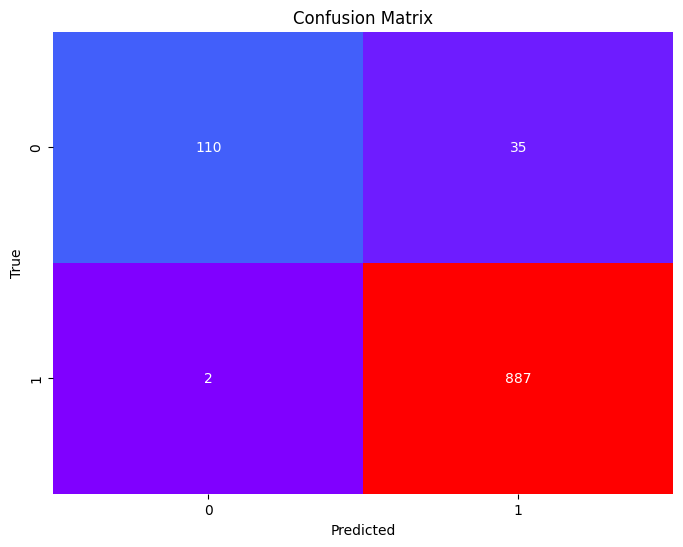

In [17]:
cm = confusion_matrix(Y_test, model.predict(X_test_features))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='rainbow', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [19]:
def plot_top_words(word_freq, title, color):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(word_freq.values())[:10], y=list(word_freq.keys())[:10], palette=color)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(title)
    plt.show()

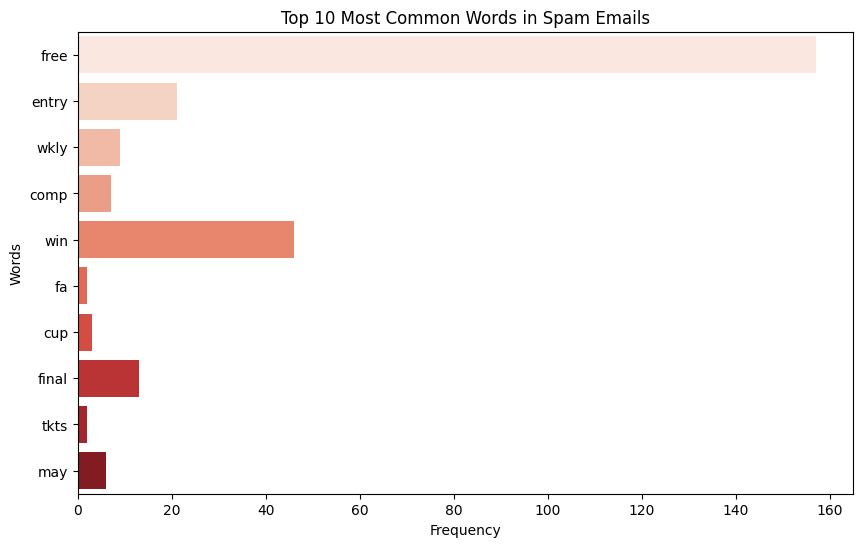

In [20]:
spam_words = " ".join(df[df['Category'] == 0]['Message']).split()
spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stopwords.words('english') and word.isalpha()])
plot_top_words(spam_word_freq, 'Top 10 Most Common Words in Spam Emails', 'Reds')

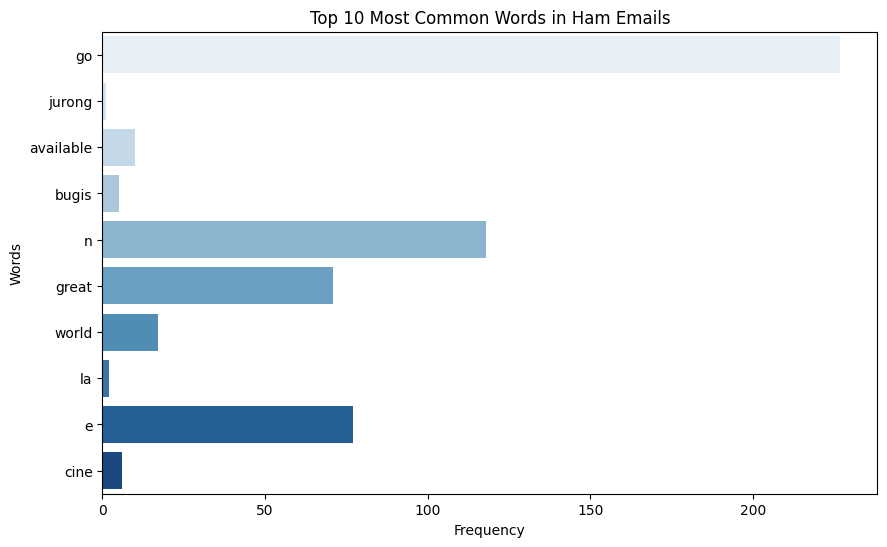

In [21]:
ham_words = " ".join(df[df['Category'] == 1]['Message']).split()
ham_word_freq = Counter([word.lower() for word in ham_words if word.lower() not in stopwords.words('english') and word.isalpha()])
plot_top_words(ham_word_freq, 'Top 10 Most Common Words in Ham Emails', 'Blues')